# Initialization

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# for p-value out of significance test
from scipy.stats import ttest_ind

In [2]:
dataFolder = "./data"
p1 = { "testDir": dataFolder + "/p1_test.csv", "trainDir": dataFolder + "/p1_train.csv" }
p2 = { "testDir": dataFolder + "/p2_test.csv", "trainDir": dataFolder + "/p2_train.csv" }
p3 = { "testDir": dataFolder + "/p3_test.csv", "trainDir": dataFolder + "/p3_train.csv" }
p4 = {}
p5 = {}

p1["test"] = np.genfromtxt(p1["testDir"], delimiter=',')
p1["train"] = np.genfromtxt(p1["trainDir"], delimiter=',')
p2["test"] = np.genfromtxt(p2["testDir"], delimiter=',')
p2["train"] = np.genfromtxt(p2["trainDir"], delimiter=',')
p3["test"] = np.genfromtxt(p3["testDir"], delimiter=',')
p3["train"] = np.genfromtxt(p3["trainDir"], delimiter=',')

# Custom functions for P1 and P2

In [3]:
# Compute mean squared error
def mse(X, Y, W):
    return (1/2) * (X @ W - Y) @ (X @ W - Y)

# Compute mean absolute error
def mae(X, Y, W):
    return np.sum(np.abs(X @ W - Y))

# Normalize a vector
def normalize(v):
    min = v.min()
    max = v.max()
    return (v - min) / (max - min)

# Standardize a vector
def standardize(v):
    mean = np.mean(v)
    std = np.std(v)
    return (v - mean) / std

# Normalize and split the training data into features matrix with bias and the result vector
def parseData(data):
    m, n = data.shape
    data = np.array([normalize(col) for col in data.T]).T
    X = np.c_[np.ones(m), data.T[:-1].T]
    Y = data.T[-1].T
    return X, Y

# Print the required metrics
def printResult(x_train, y_train, x_test, y_test, func = lambda x : x):
    x_train = func(x_train)
    x_test = func(x_test)
    
    m, n = x_train.shape
    w = np.linalg.pinv(x_train) @ y_train

    mse_train = mse(x_train, y_train, w)
    mae_train = mae(x_train, y_train, w)
    p_train = ttest_ind(x_train @ w, y_train).pvalue
    mse_test = mse(x_test, y_test, w)
    mae_test = mae(x_test, y_test, w)
    p_test = ttest_ind(x_test @ w, y_test).pvalue
    
    print("MSE (train-split)     : ", mse_train)
    print("MAE (train-split)     : ", mae_train)
    print("p-value (train-split) : ", p_train)

    print("--------------------------------------")

    print("a) MSE     : ", mse_test)
    print("b) MAE     : ", mae_test)
    print("c) p-value : ", p_test)
    return [mse_train, mae_train, p_train], [mse_test, mae_test, p_test]

# P1 (Regression Analysis)

In this problem, the task is to predict the current health (as given by the target variable) of an organism given the measurements from two biological sensors measuring their bio-markers (negative indicates that it is lesser than the average case). 

With this data, you are expected to try our linear regression models on the  training data and report the following metrics on the test split: 
- Mean Squared Error, 
- Mean Absolute Error, 
- p-value out of significance test.

**DATA:** `p1train/test.csv`

In [4]:
p1["train"].shape

(10000, 3)

In [5]:
X, Y = parseData(p1["train"])
X_test, Y_test = parseData(p1["test"])

# Initialise the parameters to be a null vector
W = np.array([0, 0, 0])

X, Y, W
# Check metrics with parameters as null vector
print(mse(X, Y, W))
print(mae(X, Y, W))

1476.0901088253356
5019.547076086856


## Linear regression
$h(x) = w_0 + w_1x_1 + w_2x_2$

In [6]:
p1["result"] = printResult(X, Y, X_test, Y_test)

MSE (train-split)     :  1.6377431789576247
MAE (train-split)     :  144.16318383122172
p-value (train-split) :  0.9999999999998793
--------------------------------------
a) MSE     :  1.0198792104638341
b) MAE     :  81.01047477588321
c) p-value :  0.030717508773848688


# P2 (Regression Analysis)

Here, you are expected to predict the lifespan of the above organism given the data from three sensors. In this case, the model is not linear.

You are expected to try several (at least 3) non-linear regression models on the train split and report the following metrics on the test split.
- Mean Squared Error
- Mean Absolute Error
- p-value out of significance test

**DATA**: `p2train/test.csv`

In [7]:
p2["train"].shape, p2["test"].shape

((10000, 4), (5000, 4))

In [8]:
X, Y = parseData(p2["train"])
X_test, Y_test = parseData(p2["test"])

# Initialise the parameters to be a null vector
W = np.array([0, 0, 0, 0])

# Check metrics with parameters as null vector
print(mse(X, Y, W))
print(mae(X, Y, W))

93.14053909693217
729.3773208010364


## Linear regression
$h(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$

In [9]:
p2["result"] = [[] for _ in range(8)]
p2["result"][0] = printResult(X, Y, X_test, Y_test)

MSE (train-split)     :  64.04261865353428
MAE (train-split)     :  792.8424805196497
p-value (train-split) :  1.0
--------------------------------------
a) MSE     :  34.45351730675273
b) MAE     :  402.40621699350675
c) p-value :  0.04567218862928123


## Non-Linear regression (1)
$h_1(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_1x_2 + w_5x_2x_3 + w_6x_3x_1 + w_7x_1^2 + w_8x_2^2 + w_9x_3^2$

In [10]:
def makeQuadratic(data):
    n = data.shape[1]
    return np.array([data.T[i] * data.T[j] for i in range(n) for j in range(n) if j <= i]).T

p2["result"][1] = printResult(X, Y, X_test, Y_test, makeQuadratic)

MSE (train-split)     :  15.025195918707364
MAE (train-split)     :  414.43543405251074
p-value (train-split) :  0.9999999999995892
--------------------------------------
a) MSE     :  8.293925461081386
b) MAE     :  214.73836188569697
c) p-value :  0.6539657025513983


## Non-Linear regression (2)
$h_2(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$
     $+ w_4x_1x_2 + w_5x_2x_3 + w_6x_3x_1 + w_7x_1^2 + w_8x_2^2 + w_9x_3^2$
     $+ w_{10}x_1x_2x_3 + w_{11}x_1^2x_2 + w_{12}x_2^2x_1 + w_{13}x_2^2x_3 + w_{14}x_3^2x_2 + w_{15}x_3^2x_1 + w_{16}x_1^2x_3 + w_{17}x_1^3 + w_{18}x_2^3 + w_{19}x_3^3$

In [11]:
def makeCubic(data):
    n = data.shape[1]
    return np.array([data.T[i] * data.T[j] * data.T[k] for i in range(n) for j in range(n) for k in range(n) if j <= i and k <= j]).T

p2["result"][2] = printResult(X, Y, X_test, Y_test, makeCubic)

MSE (train-split)     :  14.015061295947277
MAE (train-split)     :  403.4520118357519
p-value (train-split) :  0.9999999999999714
--------------------------------------
a) MSE     :  7.792580568256314
b) MAE     :  210.3268643472337
c) p-value :  0.6337887955340187


## Non-Linear regression (3)
$h_3(x) = h_1(h_1(x))$

In [12]:
p2["result"][3] = printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeQuadratic(x)))

MSE (train-split)     :  0.8243996952040266
MAE (train-split)     :  97.24998340500956
p-value (train-split) :  0.9999999999995098
--------------------------------------
a) MSE     :  0.47367918630981265
b) MAE     :  48.4986710732787
c) p-value :  0.44918301185120135


## Non-Linear regression (4)
$h_4(x) = h_1(h_2(x))$

In [13]:
p2["result"][4] = printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeCubic(x)))

MSE (train-split)     :  0.016265667882183227
MAE (train-split)     :  10.770107850314911
p-value (train-split) :  0.999999999986867
--------------------------------------
a) MSE     :  0.03926868382605306
b) MAE     :  10.629900379280002
c) p-value :  0.42898862281953176


## Non-Linear regression (5)
$h_5(x) = h_2(h_2(x))$

In [14]:
p2["result"][5] = printResult(X, Y, X_test, Y_test, lambda x : makeCubic(makeCubic(x)))

MSE (train-split)     :  0.015762615029126598
MAE (train-split)     :  10.675718560412275
p-value (train-split) :  0.9999999999146658
--------------------------------------
a) MSE     :  0.03979982849860955
b) MAE     :  10.671505405575594
c) p-value :  0.4293311009552302


## Non-Linear regression (6)
$\phi(x) = \sum_{i=0, j=0, i \neq j}^n w_{ij} x_ie^{x_j} + \sum_{i=0}^n w_{ii} x_ie^{x_i}$

$h_6(x) = \phi(h_1(x))$

In [15]:
def makeExp(data):
    n = data.shape[1]
    return np.array([data.T[i] * np.exp(data.T[j]) for i in range(n) for j in range(n) if i != j] + [data.T[i] * np.exp(data.T[i]) for i in range(n)]).T

p2["result"][6] = printResult(X, Y, X_test, Y_test, lambda x : makeExp(makeQuadratic(x)))

MSE (train-split)     :  0.01657736594080365
MAE (train-split)     :  11.059370346143844
p-value (train-split) :  0.9999999644023003
--------------------------------------
a) MSE     :  0.03941869125570922
b) MAE     :  10.746865814541174
c) p-value :  0.4282532953053031


## Non-Linear regression (7)
$h_7(x) = \phi(h_2(x))$

In [16]:
p2["result"][7] = printResult(X, Y, X_test, Y_test, lambda x : makeExp(makeCubic(x)))

MSE (train-split)     :  0.015293426509348219
MAE (train-split)     :  10.688583380035912
p-value (train-split) :  0.9365993155260983
--------------------------------------
a) MSE     :  0.04209638251358401
b) MAE     :  11.098570146056602
c) p-value :  0.39757197242435915


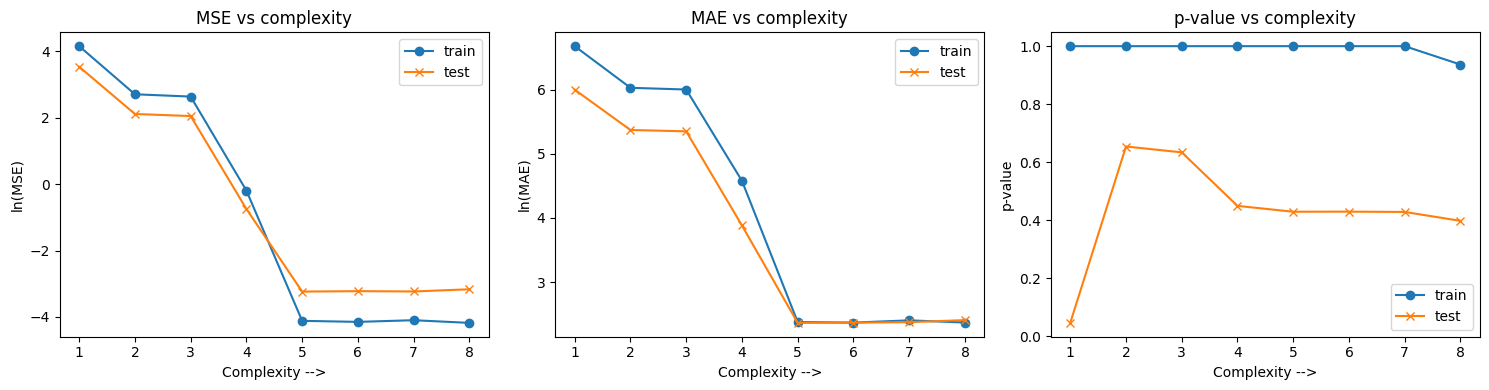

In [17]:
results = np.array(p2["result"])
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot([i + 1 for i in range(8)], [np.log(row[0][0]) for row in results], label="train", marker='o')
ax[0].plot([i + 1 for i in range(8)], [np.log(row[1][0]) for row in results], label="test", marker='x')
ax[0].set_xlabel("Complexity -->")
ax[0].set_ylabel("ln(MSE)")
ax[0].legend()
ax[0].set_title("MSE vs complexity")

ax[1].plot([i + 1 for i in range(8)], [np.log(row[0][1]) for row in results], label="train", marker='o')
ax[1].plot([i + 1 for i in range(8)], [np.log(row[1][1]) for row in results], label="test", marker='x')
ax[1].set_xlabel("Complexity -->")
ax[1].set_ylabel("ln(MAE)")
ax[1].legend()
ax[1].set_title("MAE vs complexity")

ax[2].plot([i + 1 for i in range(8)], [(row[0][2]) for row in results], label="train", marker='o')
ax[2].plot([i + 1 for i in range(8)], [(row[1][2]) for row in results], label="test", marker='x')
ax[2].set_xlabel("Complexity -->")
ax[2].set_ylabel("p-value")
ax[2].legend()
ax[2].set_title("p-value vs complexity")

fig.tight_layout()

# Custom functions for P3, P4 and P5

In [196]:
def logNormal(x, mean, cov):
    n = mean.shape[0]
    return - 0.5 * (n * np.log(2 * np.pi * np.linalg.det(cov)) + ((x - mean) @ np.linalg.inv(cov) @ (x - mean)))

# assume independent features
def logExp(x, mean, _):
    # ignore features with negative mean
    # for i in range(mean.size):
    #     if x[i] <= 0:
    #         np.delete(mean, i)
    #         np.delete(x, i)
    # print("Mean: ", mean)
    return - np.log(np.abs(np.prod(mean))) - np.reciprocal(mean) @ x

def naiveLogNormal(x, u, v):
    return -0.5 * np.sum([np.log(2 * np.pi * v[i][i]) + (x[i] - u[i]) * (x[i] - u[i])/v[i][i] for i in range(u.shape[0]) if v[i][i] > 0])

def classify(x, classStats, density):
    label = 0
    max = -99999
    sum = 0
    prob = []
    for key in classStats:
        mean = classStats[key]["mean"]
        cov = classStats[key]["cov"]
        prior = classStats[key]["prior"]
        value = np.log(prior) + density(x, mean, cov)
        prob.append(value)
        sum += value
        if value > max:
            max, label = value, key
    return np.r_[[label], (np.array(prob) / sum)]
    
class metrics:
    def accuracy(predicted, actual):
        m = actual.size
        correctCount = sum([1 if int(predicted[i]) == int(actual[i]) else 0 for i in range(m)])
        return correctCount / m
    
    def confusionMatrix(predicted, actual, n = 5):
        cnf = np.zeros((n, n), dtype='uint')
        for i in range(actual.size):
            cnf[int(actual[i])][int(predicted[i])] += 1
        return cnf
    
    # precision = TP/(TP + FP), recall = TP/(TP + FN), 
    # f1 = 2 * precision * recall / (precision + recall)
    def f1Score(cnf):
        sum_predict = np.sum(cnf, axis=0)
        sum_actual  = np.sum(cnf, axis=1)
        f1 = np.zeros(cnf.shape[1])
        for i in range(f1.size):
            TP = cnf[i][i]
            FP, FN = sum_predict[i] - TP, sum_actual[i] - TP
            p, r = TP/(TP + FP), TP/(TP + FN)
            f1[i] = 2 * p * r / (p + r)
        return f1
    
    def roc(predict, actual, prob, ax, labels=[0, 1], thresolds=[0, 0.2, 0.4, 0.6, 0.8, 1]):
        ax.set_xlabel("False positive rate")
        ax.set_ylabel("True positive rate")
        
        for label in labels:
            tp, fp, tn, fn = [np.zeros(len(thresolds)) for _ in range(4)]
            for t in range(len(thresolds)):
                for i in range(actual.shape[0]):
                    if float(prob[i][label]) >= thresolds[t]:
                        if actual[i] == 0:
                            tp[t] += 1.0
                        else:
                            fp[t] += 1.0
                    else:
                        if actual[i] == 0:
                            fn[t] += 1.0
                        else:
                            tn[t] += 1.0
                        
            fpr = fp / (fp + tn + 1e-7)
            tpr = tp / (tp + fn + 1e-7)
            ax.plot(fpr, tpr, label=label, marker='x')
    
    def print(X, Y, X_test, Y_test, classStats, density):
        n_labels = len(classStats)
        train = np.array([classify(x, classStats, density) for x in X])
        test = np.array([classify(x, classStats, density) for x in X_test])
        y_train, p_train = train.T[0], train.T[1:].T
        y_test, p_test = test.T[0], test.T[1:].T
                
        cnf_train = metrics.confusionMatrix(y_train, Y, n_labels)
        cnf_test = metrics.confusionMatrix(y_test, Y_test, n_labels)
        acc_train = metrics.accuracy(y_train, Y)
        acc_test = metrics.accuracy(y_test, Y_test)
        f1_train = metrics.f1Score(cnf_train)
        f1_test = metrics.f1Score(cnf_test)
        
        print("------------------ Train ---------------------")
        print("Classification Accuracy : ", acc_train)
        print("F1 Score                : ", f1_train)
        print("------------------ Test ----------------------")
        print("Classification Accuracy : ", acc_test)
        print("F1 Score                : ", f1_test)
        
        fig, ax = plt.subplots(2, 2, figsize=(15, 8))
        ax[0][0].matshow(cnf_train)
        ax[0][0].set_xlabel("Predicted")
        ax[0][0].set_ylabel("Actual")
        ax[0][0].set_title("Confusion Matrix (train)")
        
        ax[0][1].matshow(cnf_test)
        ax[0][1].set_xlabel("Predicted")
        ax[0][1].set_ylabel("Actual")
        ax[0][1].set_title("Confusion Matrix (test)")
        
        ax[1][0].set_title("ROC (train)")
        ax[1][1].set_title("ROC (test)")
        
        thresolds = [i/100 for i in range(100)]
        metrics.roc(y_train, Y, p_train, ax[1][0], thresolds=thresolds)
        metrics.roc(y_test, Y_test, p_test, ax[1][1], thresolds=thresolds)

        return [acc_train, f1_train], [acc_test, f1_test]
    
def imgToFeatures(label, data, stats=False):
    X = np.array([x.flatten() for x in data]) / 255
    Y = label * np.ones(data.shape[0])
    if stats:
        return X, Y, { "mean": np.mean(X, axis=0), "cov": np.cov(X.T), "prior": data.shape[0] }
    return X, Y

# returns X, Y, X_test, Y_test and classStats
def trainTestSplit(data, train_ratio, func = imgToFeatures):
    n = data.shape[0]
    m = int(np.floor(data.shape[1] * train_ratio))
    classStats = {}
    x_train, y_train, x_test, y_test = [[[] for _ in range(n)] for _ in range(4)]
    for label in range(n):
        x_train[label], y_train[label], classStats[label] = func(label, data[label][:m], True)
        x_test[label], y_test[label] = func(label, data[label][m:])
    
    X, Y, X_test, Y_test = [x.reshape(-1, x.shape[-1]) for x in [np.array(x) for x in [x_train, y_train, x_test, y_test]]]
    return X, Y.flatten(), X_test, Y_test.flatten(), classStats

# P3 (Multi-class classification)

We have data from 10 sensors fitted in an industrial plant. There are five classes indicating which product is being produced. The task is to predict the product being produced by looking at the observation from these 10 sensors. 

Given this, you are expected to implement 
- Bayes’ classifiers with 0-1 loss assuming Normal, exponential, and GMMs (with diagonal co-variances) as class-conditional densities. For GMMs, code up the EM algorithm,
- Linear classifier using the one-vs-rest approach
- Multi-class Logistic regressor with gradient descent.

The metrics to be computed are 
- Classification accuracy, 
- Confusion matrix,
- Class-wise F1 score, 
- RoC curves for any pair of classes, and 
- likelihood curve for EM with different choices for the number of mixtures as hyper-parameters, 
- Emipiral risk on the train and test data while using logistic regressor.

**DATA:** `p3train/test.csv`

In [192]:
p3["train"].shape, p3["test"].shape

((60000, 11), (15000, 11))

In [193]:
classStats = {}
for row in p3["train"]:
    label = int(row[-1]) - 1
    if label in classStats:
        classStats[label].append(row[:-1])
    else:
        classStats[label] = [row[:-1]]

# classStats = [np.array(data) for data in classStats]
for i in range(len(classStats)):
    data = np.array(classStats[i])
    classStats[i] = { "mean": np.mean(data, axis=0), "cov": np.cov(data.T), "prior": data.shape[0] }

In [194]:
def splitData(data):
    X = data.T[:-1].T
    Y = data.T[-1].T.astype("int") - 1
    return X, Y

X, Y = splitData(p3["train"])
X_test, Y_test = splitData(p3["test"])

## Bayes' classifier with normal distribution

------------------ Train ---------------------
Classification Accuracy :  0.5906666666666667
F1 Score                :  [0.55688599 0.57825972 0.64442454 0.60400323 0.57840443]
------------------ Test ----------------------
Classification Accuracy :  0.5884
F1 Score                :  [0.54269883 0.57421582 0.64145558 0.597958   0.59275453]


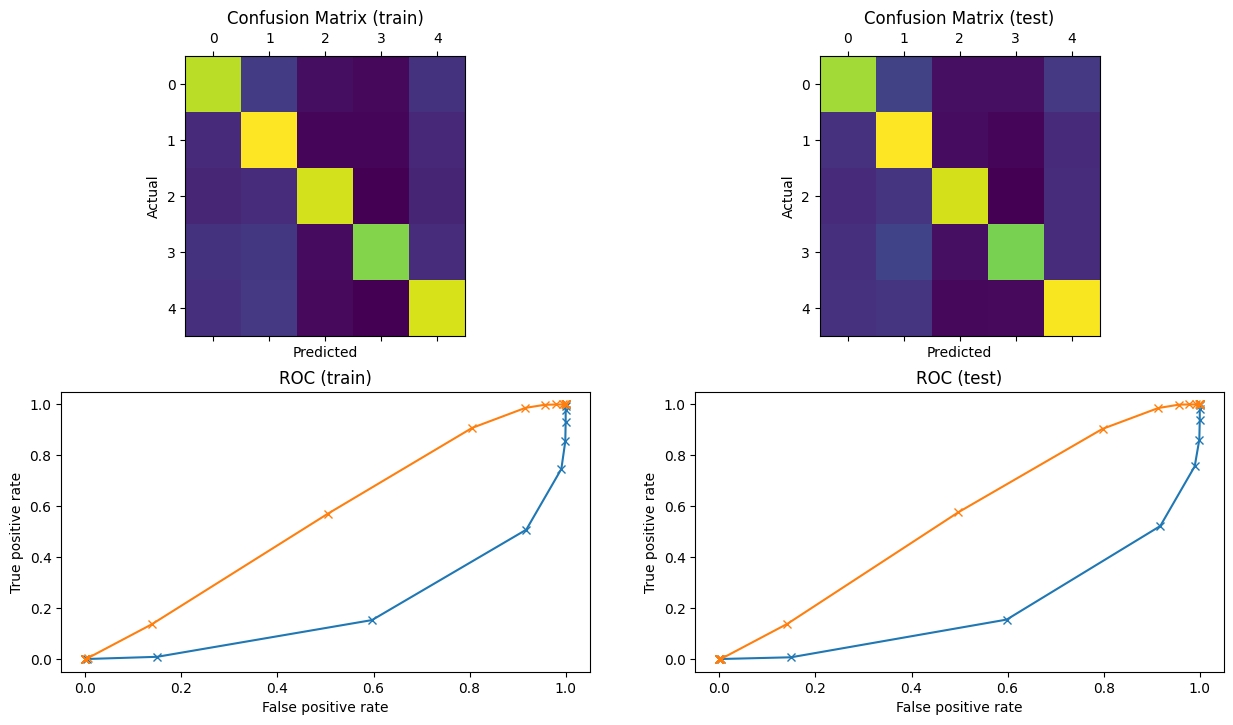

In [197]:
p3["result"] = [[] for _ in range(5)]
p3["result"][0] = metrics.print(X, Y, X_test, Y_test, classStats, logNormal)

## Bayes' classifier with exponential distribution

------------------ Train ---------------------
Classification Accuracy :  0.20075
F1 Score                :  [0.28484541 0.0531404  0.22726558 0.01323236 0.24428515]
------------------ Test ----------------------
Classification Accuracy :  0.20113333333333333
F1 Score                :  [0.27855224 0.05824259 0.22509225 0.01099256 0.25139107]


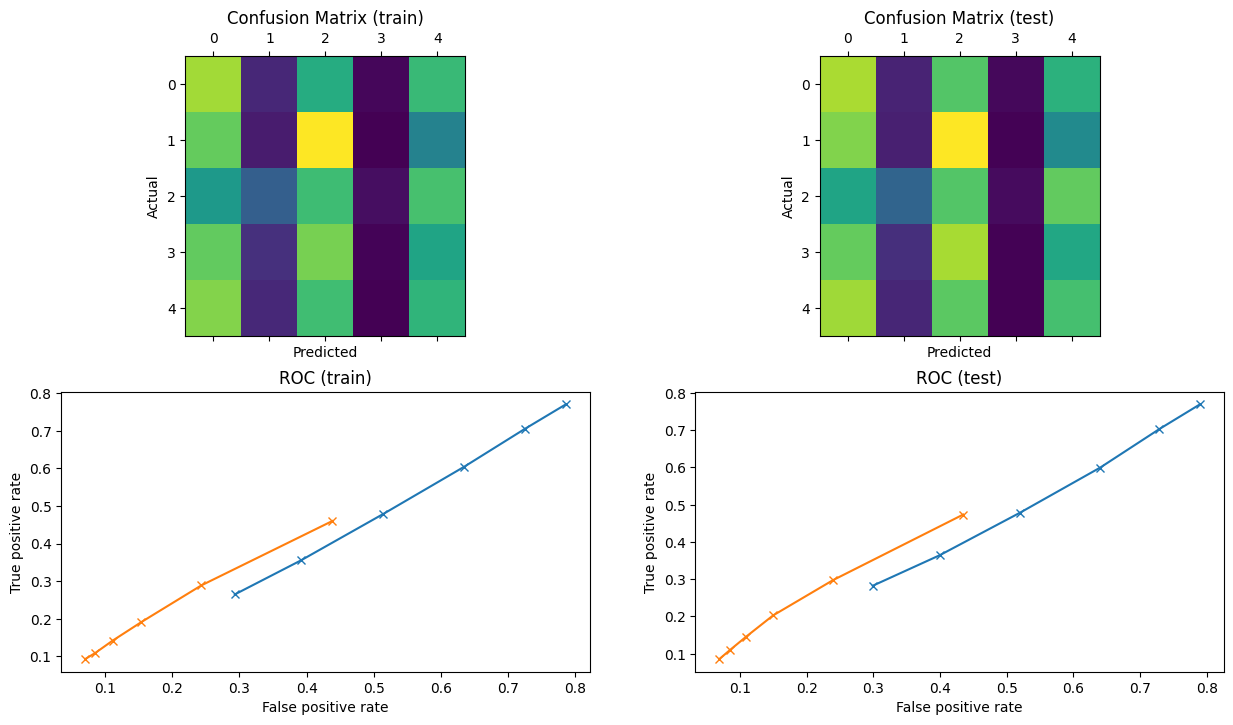

In [182]:
p3["result"][1] = metrics.print(X, Y, X_test, Y_test, classStats, logExp)

## Bayes' classifier with GMM distribution

## Logistic Regression

Stopping criterion met
Test accuracy: 0.5729333333333333
Training empirical risk: 1.143055073618712
Training error rate: 0.4296333333333333
Test empirical risk: 1.140564993696415
Test error rate: 0.4270666666666667
Confusion matrix:
[[1513.  390.  300.  376.  392.]
 [ 374. 1697.  298.  286.  326.]
 [ 308.  306. 1881.  256.  289.]
 [ 339.  345.  263. 1738.  290.]
 [ 350.  327.  253.  338. 1765.]]
Class-wise F1 score:
[0.51682322 0.56136288 0.62336371 0.5823421  0.57916324]


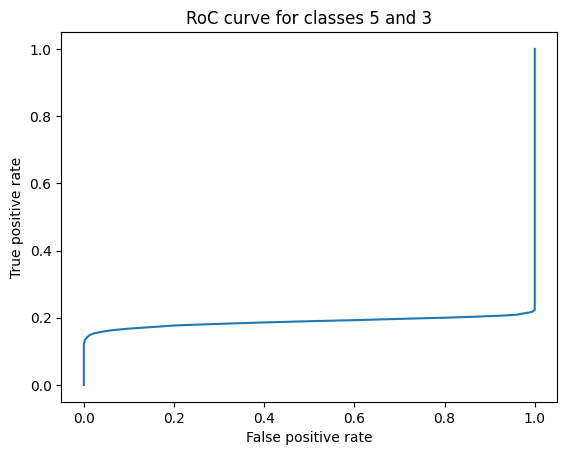

In [167]:
train_data = np.genfromtxt("data/p3_train.csv", delimiter=',')
test_data = np.genfromtxt("data/p3_test.csv", delimiter=',')

# Split data into features and labels
X_train = train_data[:, :-1]
y_train_orig = train_data[:, -1]
X_test = test_data[:, :-1]
y_test_orig = test_data[:, -1]

# One-hot encode target variable
num_classes = 5
num_samples = y_train_orig.shape[0]
y_train = np.zeros((num_samples, num_classes))
for i in range(num_samples):
    y_train[i, int(y_train_orig[i]) - 1] = 1


# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Define softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


# Initialize weights and biases
num_features = X_train.shape[1]
W = np.random.randn(num_features, num_classes)
b = np.random.randn(num_classes)

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000
epsilon = 1e-8

# Train model using gradient descent
prev_loss = float('inf')
for i in range(num_iterations):
    # Forward propagation
    z = np.dot(X_train, W) + b
    y_pred = softmax(z)

    # Compute loss
    loss = -np.sum(y_train * np.log(y_pred + epsilon)) / num_samples

    # Backward propagation
    dz = y_pred - y_train
    dW = np.dot(X_train.T, dz) / num_samples
    db = np.sum(dz, axis=0) / num_samples

    # Update weights and biases
    W -= learning_rate * dW
    b -= learning_rate * db

    # Check stopping criterion
    if prev_loss - loss < epsilon:
        print('Stopping criterion met')
        break

    prev_loss = loss

# Evaluate model on test set
z = np.dot(X_test, W) + b
y_pred = np.argmax(softmax(z), axis=1) + 1
accuracy = np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
print('Test accuracy:', accuracy)


z_train = np.dot(X_train, W) + b
y_train_pred = np.argmax(softmax(z_train), axis=1) + 1
train_loss = -np.sum(y_train * np.log(softmax(z_train) + epsilon)) / num_samples
train_error_rate = 1 - np.sum(y_train_pred == y_train_orig) / y_train_orig.shape[0]
print('Training empirical risk:', train_loss)
print('Training error rate:', train_error_rate)

# Compute empirical risk on test data
num_samples_test = y_test_orig.shape[0]
y_test = np.zeros((num_samples_test, num_classes))
for i in range(num_samples_test):
    y_test[i, int(y_test_orig[i]) - 1] = 1

z_test = np.dot(X_test, W) + b
test_loss = -np.sum(y_test * np.log(softmax(z_test) + epsilon)) / num_samples_test
test_error_rate = 1 - np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
print('Test empirical risk:', test_loss)
print('Test error rate:', test_error_rate)



num_classes = len(np.unique(y_test_orig))
confusion_matrix = np.zeros((num_classes, num_classes))
for i in range(len(y_test_orig)):
    true_class = int(y_test_orig[i] - 1)
    predicted_class = int(y_pred[i] - 1)
    confusion_matrix[true_class, predicted_class] += 1
print('Confusion matrix:')
print(confusion_matrix)


num_classes = len(np.unique(y_test_orig))
f1_scores = np.zeros(num_classes)
for i in range(num_classes):
    true_positives = confusion_matrix[i, i]
    false_positives = np.sum(confusion_matrix[:, i]) - true_positives
    false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1_scores[i] = 2 * precision * recall / (precision + recall + 1e-8)
print('Class-wise F1 score:')
print(f1_scores)

from matplotlib import pyplot as plt

# Choose two classes
class_1 = 5
class_2 = 3

# Get predicted probabilities for the two classes
y_class_1 = y_pred == class_1
y_class_2 = y_pred == class_2
y_prob_1 = softmax(z)[:, class_1 - 1]
y_prob_2 = softmax(z)[:, class_2 - 1]

# Compute true positive rate and false positive rate
num_thresholds = 100
tpr = np.zeros(num_thresholds)
fpr = np.zeros(num_thresholds)
for i in range(num_thresholds):
    threshold = i / (num_thresholds - 1)
    tp = np.sum((y_prob_1 >= threshold) & (y_class_1 == True))
    fp = np.sum((y_prob_1 >= threshold) & (y_class_1 == False))
    tn = np.sum((y_prob_2 < threshold) & (y_class_2 == True))
    fn = np.sum((y_prob_2 < threshold) & (y_class_2 == False))
    tpr[i] = tp / (tp + fn + 1e-8)
    fpr[i] = fp / (fp + tn + 1e-8)

# Plot RoC curve
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RoC curve for classes {} and {}'.format(class_1, class_2))
plt.show()

## Linear classifier using one vs all approach

Test accuracy: 0.48706666666666665
Confusion matrix:
[[1157.  439.  512.  441.  422.]
 [ 416. 1536.  499.  190.  340.]
 [ 221.  358. 1906.  189.  366.]
 [ 294.  519.  518. 1397.  247.]
 [ 530.  458.  447.  288. 1310.]]
Class-wise F1 score: [0.41402754914263673, 0.48831663783520307, 0.5507078829660641, 0.5098540096334588, 0.4582021636073336]


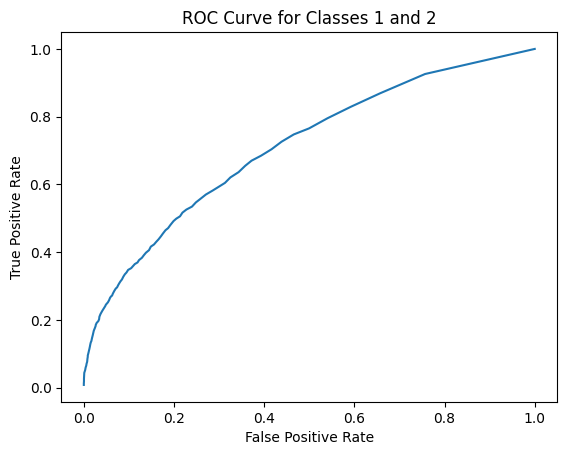

In [212]:
data = p3["train"]
X = data[:, :-1]  # Features
y = data[:, -1]   # Labels

# One-hot encode target variable
num_classes = 5
num_samples = y.shape[0]
y_encoded = np.zeros((num_samples, num_classes))
for i in range(num_samples):
    y_encoded[i, int(y[i]) - 1] = 1

# Add a column of 1s to X for bias term
X = np.hstack((X, np.ones((num_samples, 1))))

# Initialize weights
num_features = X.shape[1]
W = np.random.randn(num_features, num_classes)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000
epsilon = 1e-8

# Train model using gradient descent
prev_loss = float('inf')
for i in range(num_iterations):
    # Forward propagation
    z = np.dot(X, W)
    y_pred = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    # Compute loss
    loss = -np.sum(y_encoded * np.log(y_pred + epsilon)) / num_samples

    # Backward propagation
    dz = y_pred - y_encoded
    dW = np.dot(X.T, dz) / num_samples

    # Update weights
    W -= learning_rate * dW

    # Check stopping criterion
    if prev_loss - loss < epsilon:
        print('Stopping criterion met')
        break

    prev_loss = loss

# Evaluate model on test set
X_test = test_data[:, :-1]
y_test_orig = test_data[:, -1]
num_test_samples = y_test_orig.shape[0]

# One-hot encode target variable
y_test = np.zeros((num_test_samples, num_classes))
for i in range(num_test_samples):
    y_test[i, int(y_test_orig[i]) - 1] = 1

# Add a column of 1s to X_test for bias term
X_test = np.hstack((X_test, np.ones((num_test_samples, 1))))

# Compute predictions on test set
z_test = np.dot(X_test, W)
y_test_pred = np.argmax(z_test, axis=1) + 1

# Compute test accuracy
test_accuracy = np.sum(y_test_pred == y_test_orig) / num_test_samples
print('Test accuracy:', test_accuracy)

conf_matrix = np.zeros((num_classes, num_classes))
for i in range(num_test_samples):
    true_class = int(y_test_orig[i]) - 1
    pred_class = int(y_test_pred[i]) - 1
    conf_matrix[true_class, pred_class] += 1
print('Confusion matrix:')
print(conf_matrix)

# Compute class-wise F1 score
f1_scores = []
for c in range(num_classes):
    tp = conf_matrix[c,c]
    fp = np.sum(conf_matrix[:,c]) - tp
    fn = np.sum(conf_matrix[c,:]) - tp
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    f1 = 2 * precision * recall / (precision + recall + epsilon)
    f1_scores.append(f1)
print('Class-wise F1 score:', f1_scores)

# Compute predictions on test set
z_test = np.dot(X_test, W)
y_test_prob = np.exp(z_test) / np.sum(np.exp(z_test), axis=1, keepdims=True)
y_test_pred = np.argmax(z_test, axis=1) + 1

# Choose two classes for ROC curve
class1 = 1
class2 = 2

# Compute false positive rate and true positive rate for different thresholds
fpr = []
tpr = []
num_thresholds = 100
for i in range(num_thresholds):
    threshold = i / num_thresholds
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(num_test_samples):
        if y_test_orig[j] == class1:
            if y_test_prob[j][class1-1] >= threshold:
                tp += 1
            else:
                fn += 1
        elif y_test_orig[j] == class2:
            if y_test_prob[j][class1-1] >= threshold:
                fp += 1
            else:
                tn += 1
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classes {} and {}'.format(class1, class2))
plt.show()

# P4 (Multi-class classification)

In this problem, we consider an image dataset called Kannada-MNIST. This dataset contains images (60,000 images with 6000 per class) of digits from the south Indian language of Kannada. The task is to build a 10-class classifier for the digits. 

You are supposed to test the following classification schemes: 
- Naive Bayes’ with Normal as Class conditional
- Logistic regressor with gradient descent
- Multi-class Bayes’ classifier with GMMs with diagonal co-variances for class conditionals.

Report the following metrics on the test data: 
- Classification accuracy
- Confusion matrix
- Class-wise F1 score
- RoC curves for any pair of classes
- likelihood curve for EM with different choices for the number of mixtures as hyper-parameters
- Emipiral risk on the train and test data while using logistic regressor

In this problem, first split the data into train and test parts with the following ratios of **20:80**, **30:70**, **50:50**, **70:30**, and **90:10**, and record your observations. Train the algorithms on the train part and evaluate over the test part.

**DATA:** `images.zip`

In [149]:
%%capture
!unzip -n data/images.zip -d data

## Data handling

In [150]:
import os
from os.path import join
from PIL import Image

imageDir = "./data/images"

labels = os.listdir(imageDir)
data = [[] for _ in labels]
for label in labels:
    # label = "0"
    dir = join(imageDir, label)
    files = os.listdir(dir)
    data[int(label)] = np.array([np.array(Image.open(join(dir, file)).convert("L").resize((8, 8)), dtype='uint8') for file in files])

p4["data"] = np.array(data)
p4["data"].shape

(10, 6000, 8, 8)

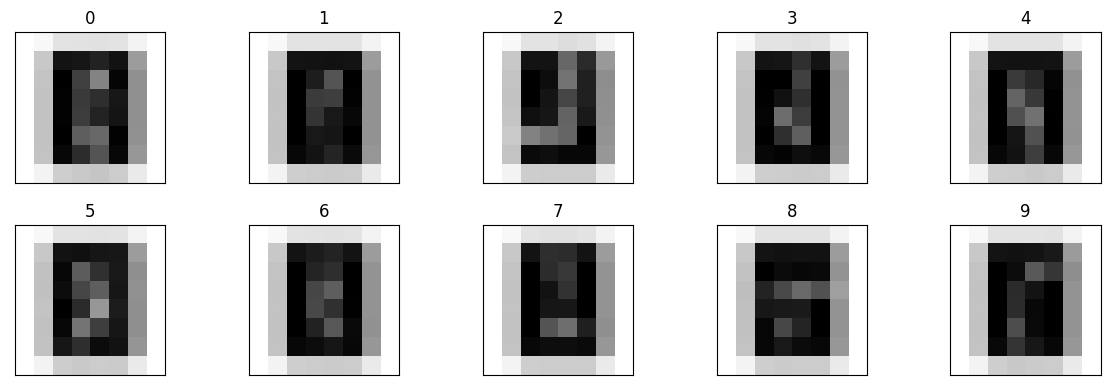

In [151]:
fig, ax = plt.subplots(2, 5, figsize=(12, 4))
for i in range(p4["data"].shape[0]):
    ax[i // 5][i % 5].imshow(p4["data"][i][0].astype(np.uint8), cmap='gray')
    ax[i // 5][i % 5].set_title(str(i))
    ax[i // 5][i % 5].get_xaxis().set_visible(False)
    ax[i // 5][i % 5].get_yaxis().set_visible(False)

fig.tight_layout()

In [161]:
p4["splitData"] = [trainTestSplit(p4["data"], r) for r in [0.2, 0.3, 0.5, 0.7, 0.9]]

## Naive Bayes

In [205]:
p4["result"] = [[] for _ in range(5)]

### Test split -- 20:80

------------------ Train ---------------------
Classification Accuracy :  0.53425
F1 Score                :  [0.3868066  0.51333729 0.94897549 0.08372828 0.42997097 0.45335003
 0.65400593 0.24928367 0.71159875 0.68919562]
------------------ Test ----------------------
Classification Accuracy :  0.5366041666666667
F1 Score                :  [0.40105254 0.50253807 0.95760041 0.08965788 0.43509903 0.43977901
 0.64502834 0.25859015 0.72446864 0.69423858]


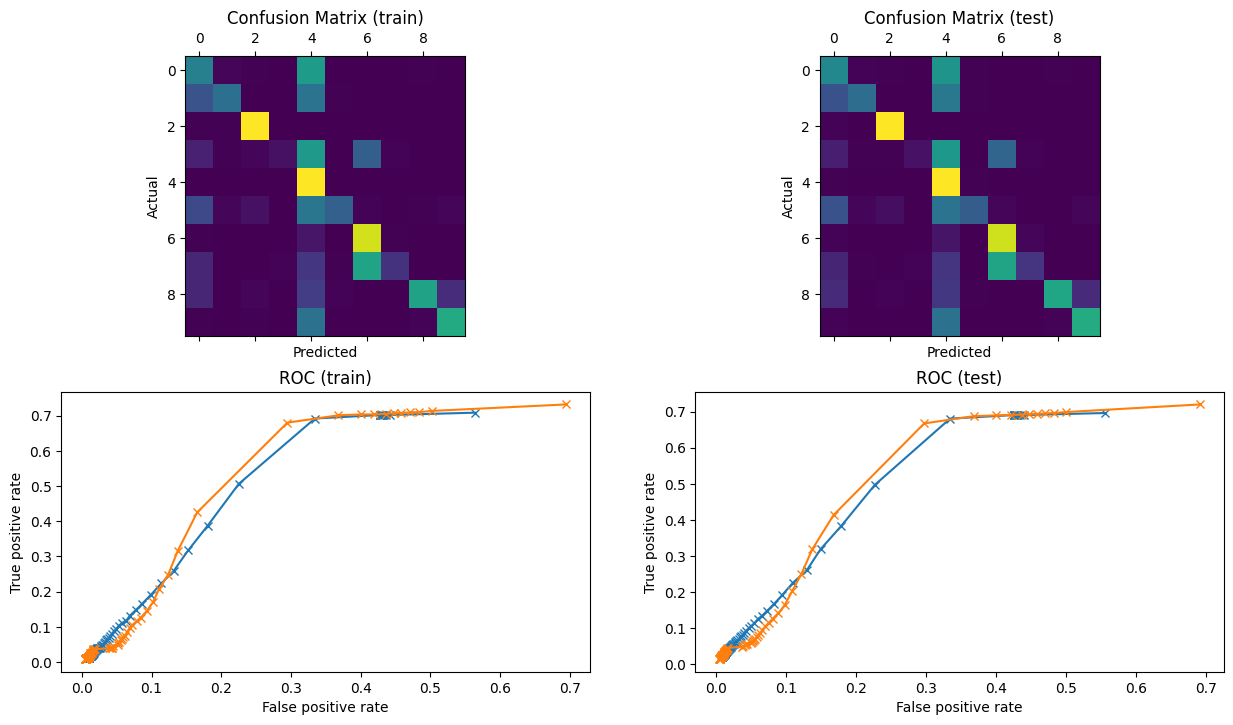

In [206]:
p4["result"][0] = metrics.print(*p4["splitData"][0], naiveLogNormal)

### Test split -- 30:70

------------------ Train ---------------------
Classification Accuracy :  0.5618333333333333
F1 Score                :  [0.4637888  0.68141881 0.92752868 0.16456922 0.42314561 0.53967007
 0.62488376 0.12118074 0.78088427 0.6947805 ]
------------------ Test ----------------------
Classification Accuracy :  0.5633095238095238
F1 Score                :  [0.48451459 0.67337808 0.92785818 0.15164105 0.42580977 0.53844859
 0.62368864 0.14554196 0.78687174 0.68726564]


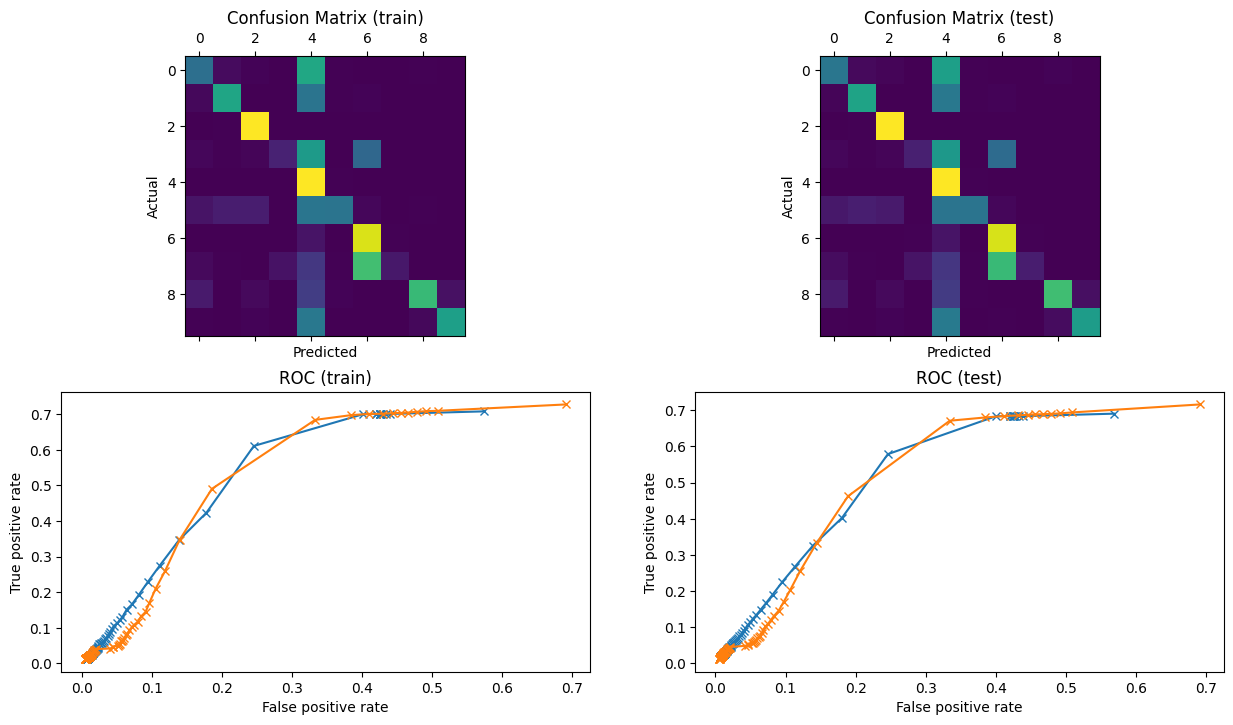

In [207]:
p4["result"][0] = metrics.print(*p4["splitData"][1], naiveLogNormal)

### Test split -- 50:50

------------------ Train ---------------------
Classification Accuracy :  0.5908666666666667
F1 Score                :  [0.50102136 0.68863262 0.95404381 0.42534762 0.44746432 0.41720319
 0.6914787  0.19567151 0.77107062 0.71343165]
------------------ Test ----------------------
Classification Accuracy :  0.5916666666666667
F1 Score                :  [0.5203933  0.67243602 0.9534537  0.4097561  0.44979367 0.40944473
 0.69336982 0.20894644 0.77740617 0.71101286]


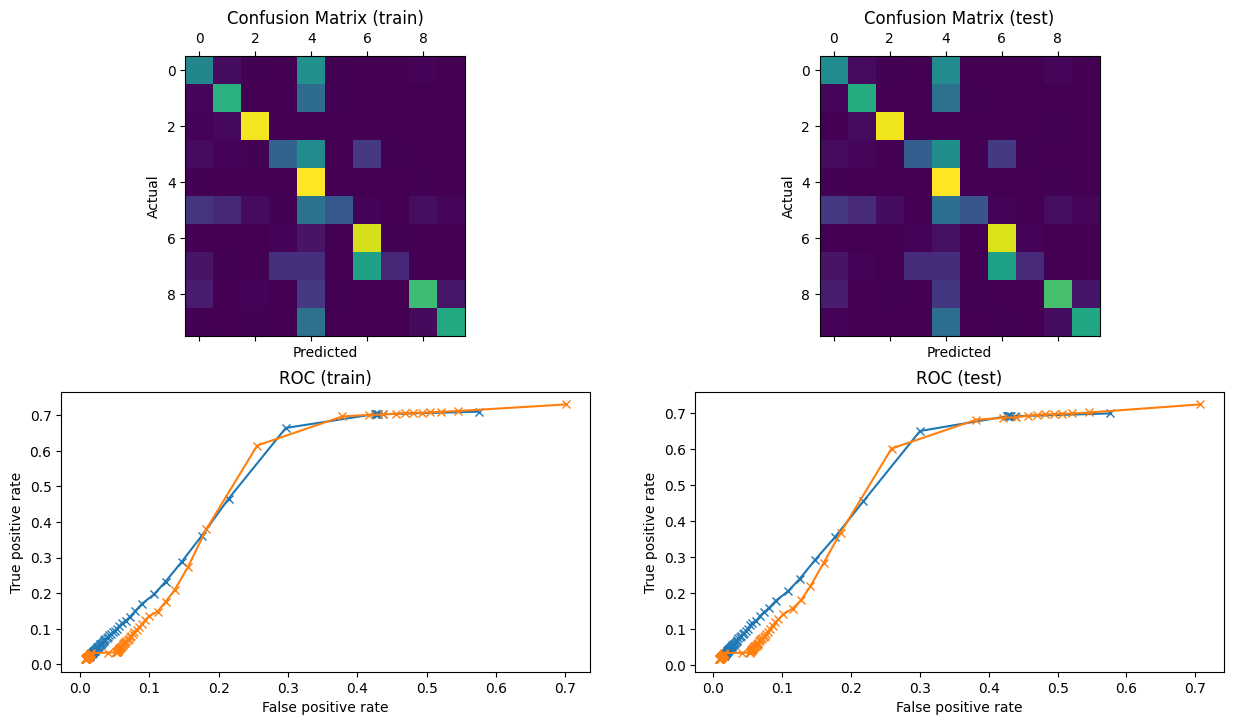

In [208]:
p4["result"][0] = metrics.print(*p4["splitData"][2], naiveLogNormal)

### Test split -- 70:30

------------------ Train ---------------------
Classification Accuracy :  0.6032142857142857
F1 Score                :  [0.52110139 0.68908008 0.956      0.48995865 0.45408023 0.41554614
 0.72346448 0.20941968 0.77344064 0.71998855]
------------------ Test ----------------------
Classification Accuracy :  0.6018333333333333
F1 Score                :  [0.53183299 0.67460815 0.95661785 0.46557148 0.45419454 0.42312634
 0.72132577 0.21386719 0.77839506 0.71938089]


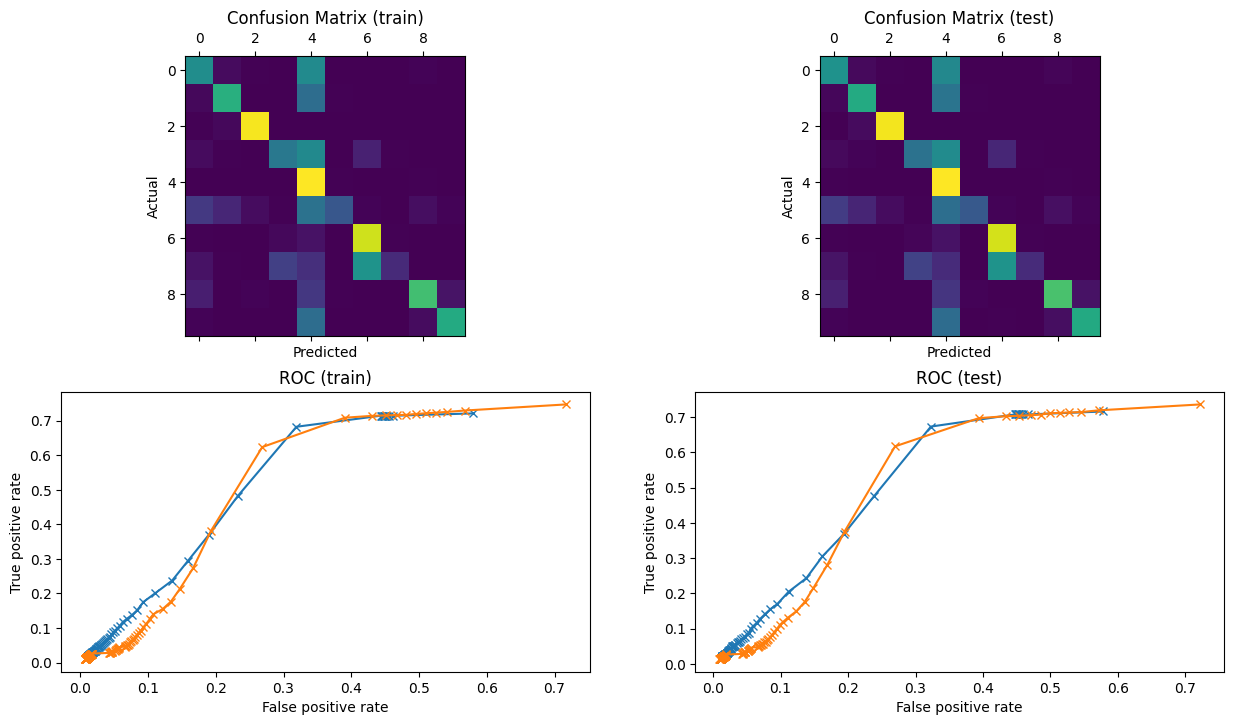

In [209]:
p4["result"][0] = metrics.print(*p4["splitData"][3], naiveLogNormal)

### Test split -- 90:10

------------------ Train ---------------------
Classification Accuracy :  0.6046296296296296
F1 Score                :  [0.52457719 0.68831034 0.95527303 0.48585121 0.45485352 0.42217788
 0.72915588 0.22502425 0.77641686 0.71626337]
------------------ Test ----------------------
Classification Accuracy :  0.6061666666666666
F1 Score                :  [0.52241379 0.69165886 0.96859504 0.47983454 0.45620864 0.41092328
 0.73041169 0.20913108 0.78228782 0.7239636 ]


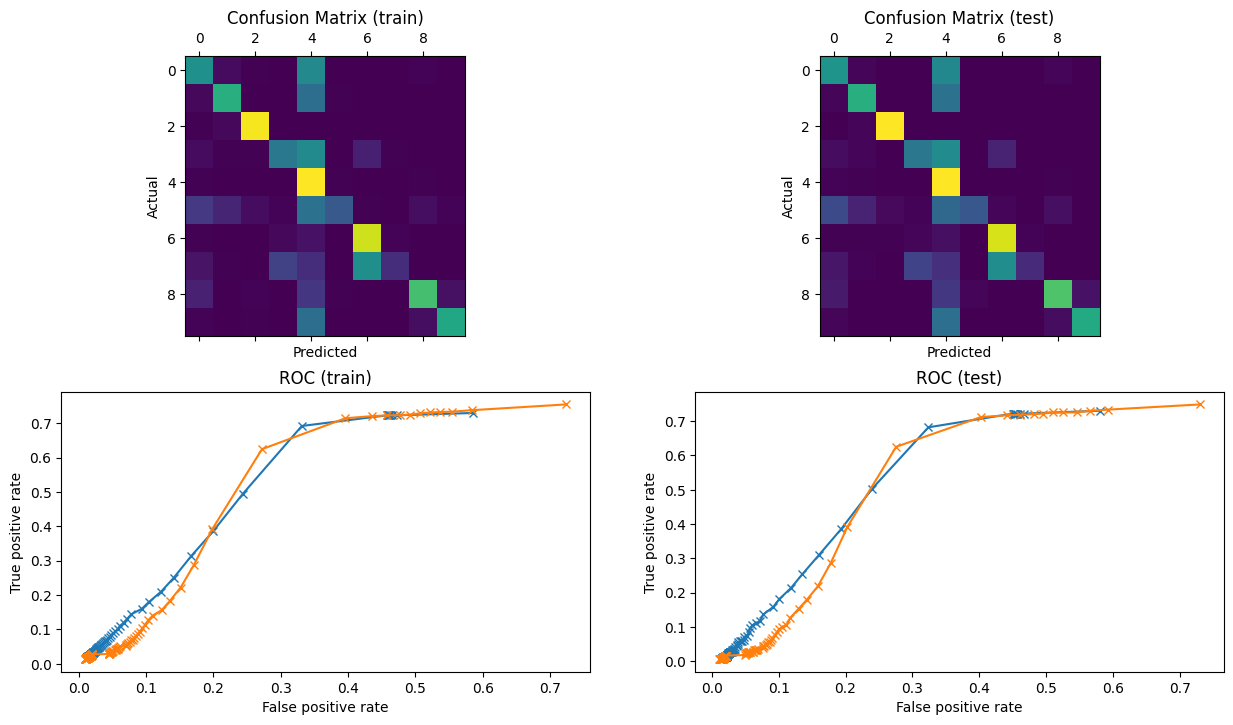

In [210]:
p4["result"][0] = metrics.print(*p4["splitData"][4], naiveLogNormal)

## Logistic Regression

In [230]:
def logisticRegressor(data):
    X_train,y_train_orig , X_test, y_test_orig, classStats = data
    num_classes = 10
    num_samples = y_train_orig.shape[0]
    y_train = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        y_train[i, int(y_train_orig[i]) - 1] = 1

    # Define sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define softmax function
    def softmax(x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # Initialize weights and biases
    num_features = X_train.shape[1]
    W = np.random.randn(num_features, num_classes)
    b = np.random.randn(num_classes)

    # Set hyperparameters
    learning_rate = 0.1
    num_iterations = 1000
    epsilon = 1e-8

    # Train model using gradient descent
    prev_loss = float('inf')
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)

        # Compute loss
        loss = -np.sum(y_train * np.log(y_pred + epsilon)) / num_samples

        # Backward propagation
        dz = y_pred - y_train
        dW = np.dot(X_train.T, dz) / num_samples
        db = np.sum(dz, axis=0) / num_samples

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Check stopping criterion
        if prev_loss - loss < epsilon:
            print('Stopping criterion met')
            break

        prev_loss = loss

    # Evaluate model on test set
    z = np.dot(X_test, W) + b
    y_pred = np.argmax(softmax(z), axis=1) + 1
    accuracy = np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test accuracy:', accuracy)

    z_train = np.dot(X_train, W) + b
    y_train_pred = np.argmax(softmax(z_train), axis=1) + 1
    train_loss = -np.sum(y_train * np.log(softmax(z_train) + epsilon)) / num_samples
    train_error_rate = 1 - np.sum(y_train_pred == y_train_orig) / y_train_orig.shape[0]
    print('Training empirical risk:', train_loss)
    print('Training error rate:', train_error_rate)

    # Compute empirical risk on test data
    num_samples_test = y_test_orig.shape[0]
    y_test = np.zeros((num_samples_test, num_classes))
    for i in range(num_samples_test):
        y_test[i, int(y_test_orig[i]) - 1] = 1

    z_test = np.dot(X_test, W) + b
    test_loss = -np.sum(y_test * np.log(softmax(z_test) + epsilon)) / num_samples_test
    test_error_rate = 1 - np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test empirical risk:', test_loss)
    print('Test error rate:', test_error_rate)

    num_classes = len(np.unique(y_test_orig))
    confusion_matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_test_orig)):
        true_class = int(y_test_orig[i] - 1)
        predicted_class = int(y_pred[i] - 1)
        confusion_matrix[true_class, predicted_class] += 1
    # print('Confusion matrix:')
    # print(confusion_matrix)


    num_classes = len(np.unique(y_test_orig))
    f1_scores = np.zeros(num_classes)
    for i in range(num_classes):
        true_positives = confusion_matrix[i, i]
        false_positives = np.sum(confusion_matrix[:, i]) - true_positives
        false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
        precision = true_positives / (true_positives + false_positives + 1e-8)
        recall = true_positives / (true_positives + false_negatives + 1e-8)
        f1_scores[i] = 2 * precision * recall / (precision + recall + 1e-8)
    print('Class-wise F1 score:')
    print(f1_scores)

    # Choose two classes
    class_1 = 5
    class_2 = 3

    # Get predicted probabilities for the two classes
    y_class_1 = y_pred == class_1
    y_class_2 = y_pred == class_2
    y_prob_1 = softmax(z)[:, class_1 - 1]
    y_prob_2 = softmax(z)[:, class_2 - 1]

    # Compute true positive rate and false positive rate
    num_thresholds = 100
    tpr = np.zeros(num_thresholds)
    fpr = np.zeros(num_thresholds)
    for i in range(num_thresholds):
        threshold = i / (num_thresholds - 1)
        tp = np.sum((y_prob_1 >= threshold) & (y_class_1 == True))
        fp = np.sum((y_prob_1 >= threshold) & (y_class_1 == False))
        tn = np.sum((y_prob_2 < threshold) & (y_class_2 == True))
        fn = np.sum((y_prob_2 < threshold) & (y_class_2 == False))
        tpr[i] = tp / (tp + fn + 1e-8)
        fpr[i] = fp / (fp + tn + 1e-8)

    # Plot RoC curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].matshow(confusion_matrix)
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    ax[0].set_title("Confusion Matrix")
    
    ax[1].plot(fpr, tpr, marker='x')
    ax[1].set_xlabel("False positive rate")
    ax[1].set_ylabel("True positive rate")                     
    ax[1].set_title("ROC curve for classes {} and {}".format(class_1, class_2))
    
    fig.tight_layout()

### Test split -- 20:80

Test accuracy: 0.56675
Training empirical risk: 1.6304075330138639
Training error rate: 0.4269166666666667
Test empirical risk: 1.6334762976960853
Test error rate: 0.43325
Class-wise F1 score:
[0.46202585 0.91866625 0.54467093 0.7344302  0.69179229 0.70099293
 0.17133607 0.60686015 0.7289605  0.1860772 ]


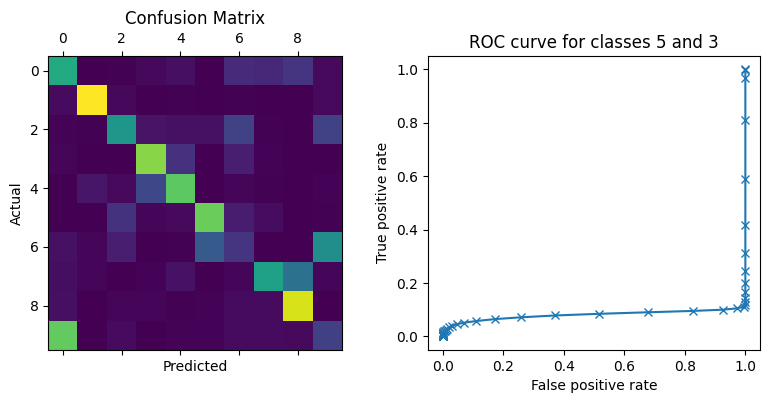

In [232]:
logisticRegressor(p4["splitData"][0])

### Test split -- 30:70

Test accuracy: 0.555404761904762
Training empirical risk: 1.705212606763903
Training error rate: 0.4448333333333333
Test empirical risk: 1.7060349829884058
Test error rate: 0.44459523809523804
Class-wise F1 score:
[0.60566404 0.87345429 0.48749677 0.68664417 0.6361964  0.66284323
 0.34922475 0.33854818 0.60219092 0.31352557]


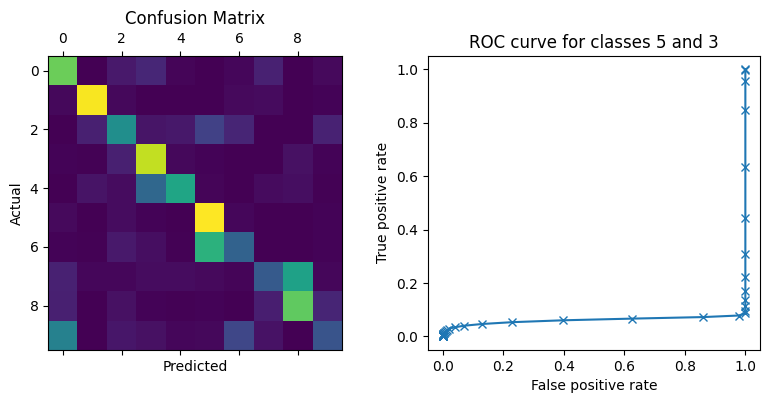

In [233]:
logisticRegressor(p4["splitData"][1])

### Test split -- 50:50

Test accuracy: 0.5082
Training empirical risk: 1.7102406310981588
Training error rate: 0.49383333333333335
Test empirical risk: 1.7060827235219826
Test error rate: 0.4918
Class-wise F1 score:
[0.38050525 0.76172666 0.30024106 0.736428   0.65621734 0.5261115
 0.54318181 0.64637985 0.51450732 0.60889266]


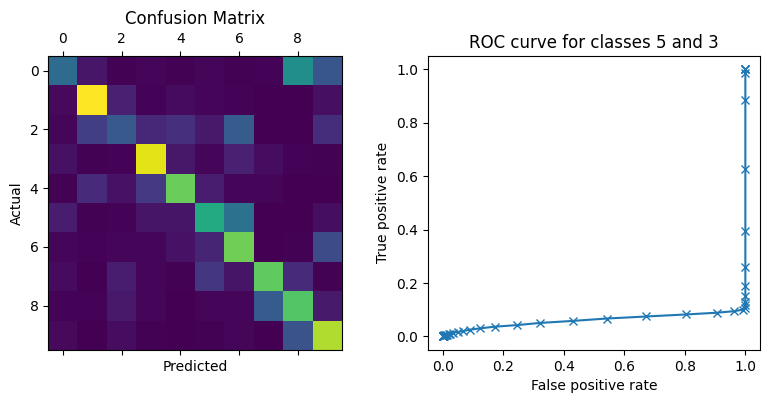

In [234]:
logisticRegressor(p4["splitData"][2])

### Test split -- 70:30

Test accuracy: 0.5583333333333333
Training empirical risk: 1.7537556338547244
Training error rate: 0.4430238095238095
Test empirical risk: 1.7541890903020672
Test error rate: 0.44166666666666665
Class-wise F1 score:
[0.28517254 0.85664639 0.63505999 0.65505541 0.6794425  0.63135888
 0.60361216 0.28894962 0.67297723 0.3811357 ]


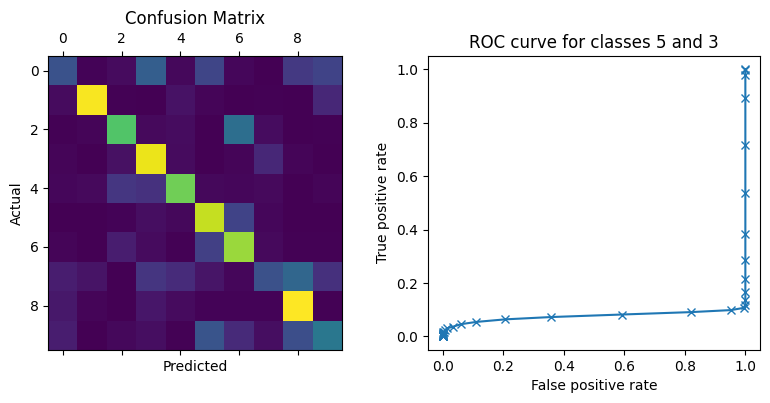

In [235]:
logisticRegressor(p4["splitData"][3])

### Test split -- 90:10

Test accuracy: 0.5711666666666667
Training empirical risk: 1.663234769465377
Training error rate: 0.4163148148148148
Test empirical risk: 1.6659744462099
Test error rate: 0.4288333333333333
Class-wise F1 score:
[0.44359464 0.89191489 0.49265341 0.73354735 0.70344827 0.62417994
 0.5321229  0.68021201 0.59186535 0.52804141]


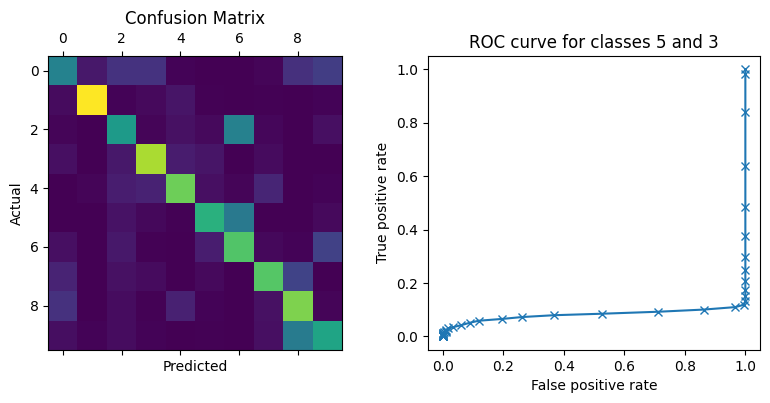

In [236]:
logisticRegressor(p4["splitData"][4])

## GMM

In [215]:
def gmm(data):
    pass

### Test split -- 20:80

In [216]:
gmm(p4["splitData"][0])

### Test split -- 30:70

In [217]:
gmm(p4["splitData"][1])

### Test split -- 50:50

In [218]:
gmm(p4["splitData"][2])

### Test split -- 70:30

In [219]:
gmm(p4["splitData"][3])

### Test split -- 90:10

In [220]:
gmm(p4["splitData"][4])

# P5 (Multi-class classification)

In this part, the data from the previous problem is ’condensed’ (using PCA) to **10 dimensions**. Repeat the above experiment with all the models and metrics and record your observations.

**DATA:** `PCA_MNIST`(KannadaMNISTPCA.csv)

In [154]:
p5["data"] = np.genfromtxt(dataFolder + "/PCA_MNIST.csv", delimiter=',')[1:]

In [155]:
p5["data"].shape

(60000, 11)

In [156]:
def stats(label, data, stats=False):
    X = data
    Y = label * np.ones(data.shape[0])
    if stats:
        return X, Y, { "mean": np.mean(X, axis=0), "cov": np.cov(X.T), "prior": data.shape[0] }
    return X, Y

classWiseData = [[] for _ in range(10)]
for row in p5["data"]:
    label = int(row[0])
    classWiseData[label].append(row[1:])
    
p5["splitData"] = [trainTestSplit(np.array(classWiseData), r, stats) for r in [0.2, 0.3, 0.5, 0.7, 0.9]]

## Naive Bayes

In [198]:
p5["result"] = [[] for _ in range(5)]

### Test split -- 20:80

------------------ Train ---------------------
Classification Accuracy :  0.8640833333333333
F1 Score                :  [0.84823285 0.91498973 0.9248215  0.8478686  0.90199336 0.90719064
 0.75204125 0.74108267 0.89643606 0.90416846]
------------------ Test ----------------------
Classification Accuracy :  0.854375
F1 Score                :  [0.83821605 0.87003058 0.94207317 0.80709745 0.91437113 0.91423126
 0.76746191 0.6976378  0.88382838 0.91434713]


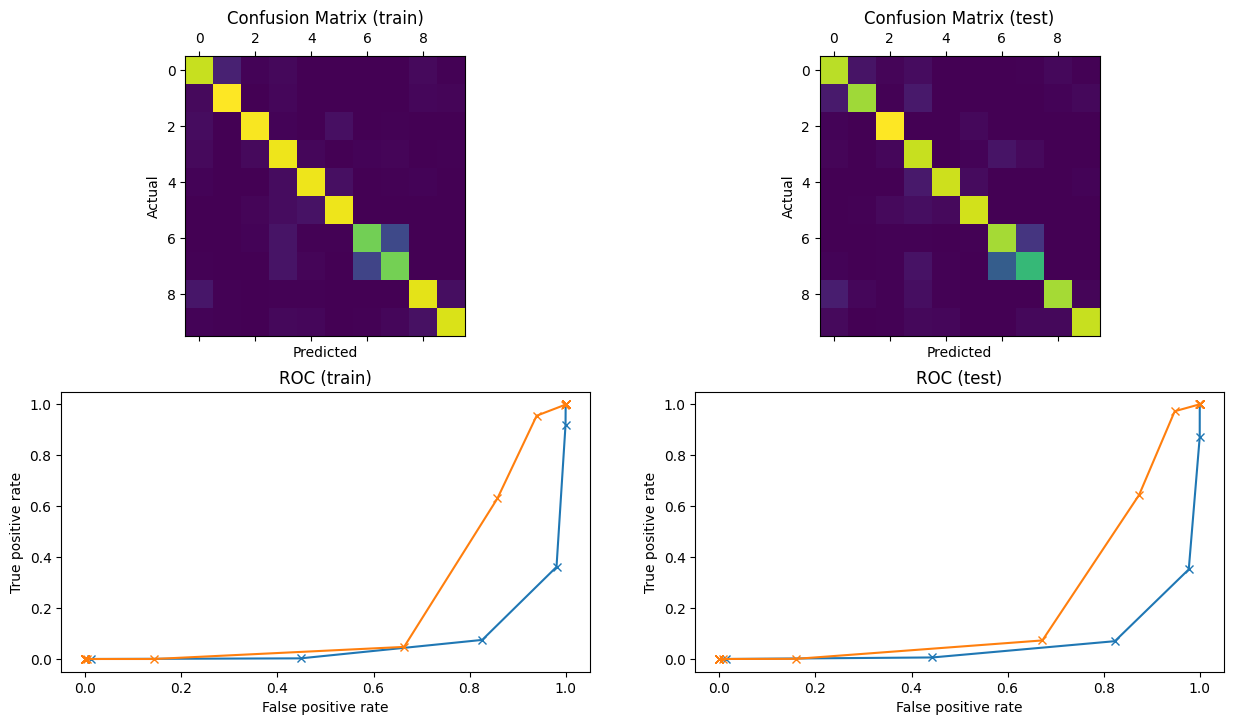

In [200]:
p5["result"][0] = metrics.print(*p5["splitData"][0], naiveLogNormal)

### Test split -- 30:70

------------------ Train ---------------------
Classification Accuracy :  0.8564444444444445
F1 Score                :  [0.81181619 0.89885762 0.9445539  0.81713849 0.90327914 0.91272523
 0.77424703 0.70992144 0.88957746 0.90383515]
------------------ Test ----------------------
Classification Accuracy :  0.8621190476190477
F1 Score                :  [0.85914998 0.88204882 0.95132691 0.85045986 0.92769637 0.9135239
 0.75937301 0.67712008 0.88513761 0.91660424]


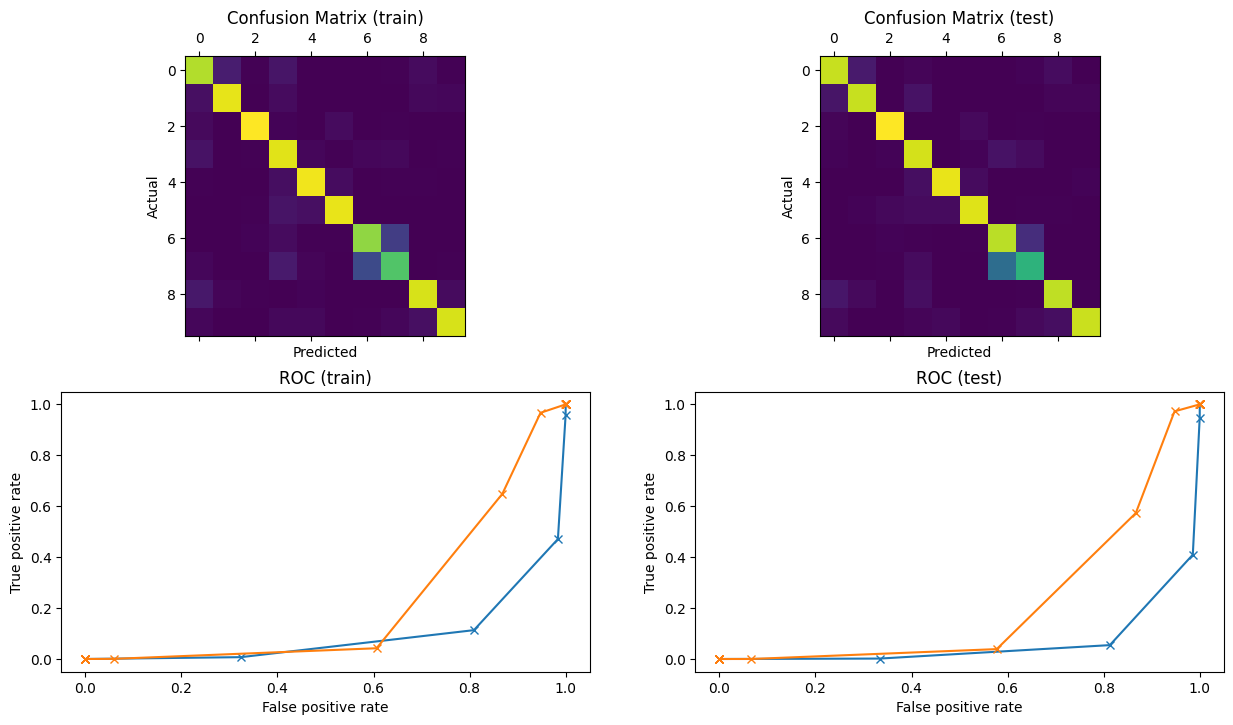

In [201]:
p5["result"][0] = metrics.print(*p5["splitData"][1], naiveLogNormal)

### Test split -- 50:50

------------------ Train ---------------------
Classification Accuracy :  0.8546
F1 Score                :  [0.83338898 0.88577088 0.94113667 0.83933605 0.90362627 0.90924258
 0.76022427 0.71155473 0.86105407 0.90295506]
------------------ Test ----------------------
Classification Accuracy :  0.8749333333333333
F1 Score                :  [0.85766063 0.88504783 0.95464583 0.89912138 0.92656876 0.90888346
 0.77265113 0.69736367 0.92548758 0.9206238 ]


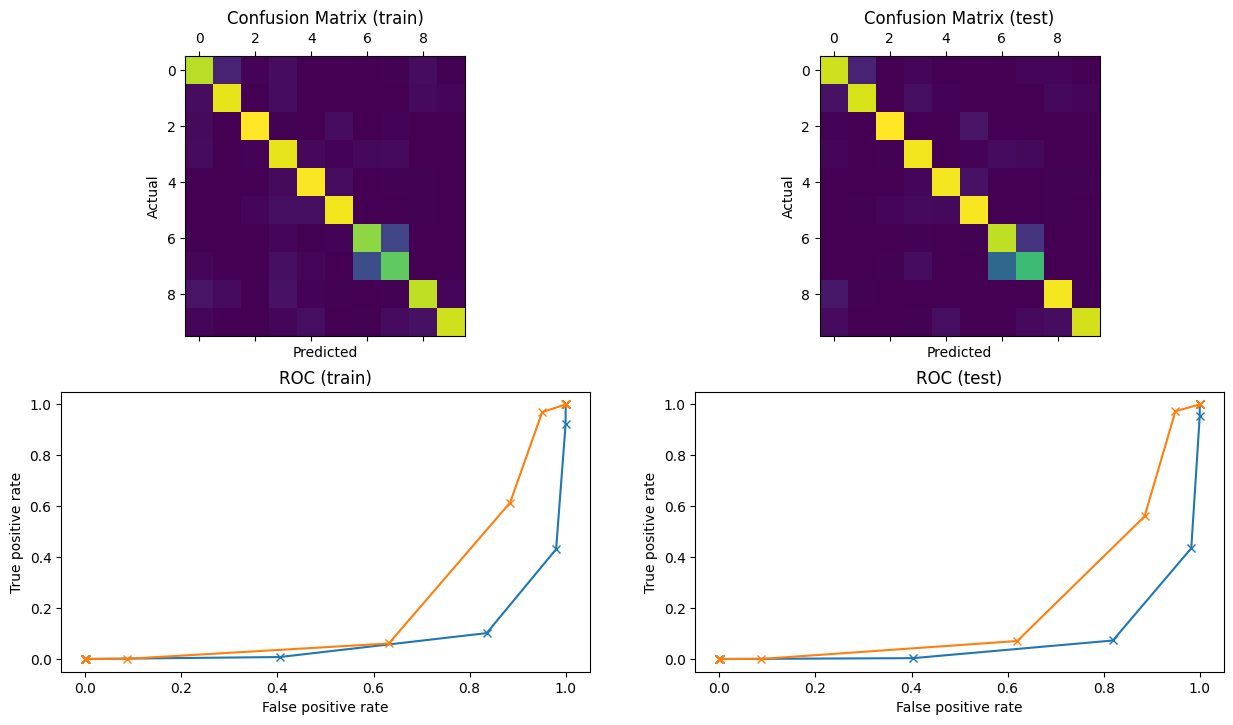

In [202]:
p5["result"][0] = metrics.print(*p5["splitData"][2], naiveLogNormal)

### Test split -- 70:30

------------------ Train ---------------------
Classification Accuracy :  0.8580476190476191
F1 Score                :  [0.83220359 0.88074257 0.94734317 0.84998862 0.89760654 0.91310575
 0.76700059 0.71902227 0.87095203 0.90349025]
------------------ Test ----------------------
Classification Accuracy :  0.8865555555555555
F1 Score                :  [0.89262473 0.89566986 0.94751693 0.92025862 0.9534307  0.92098697
 0.78277697 0.67358185 0.92311842 0.94121054]


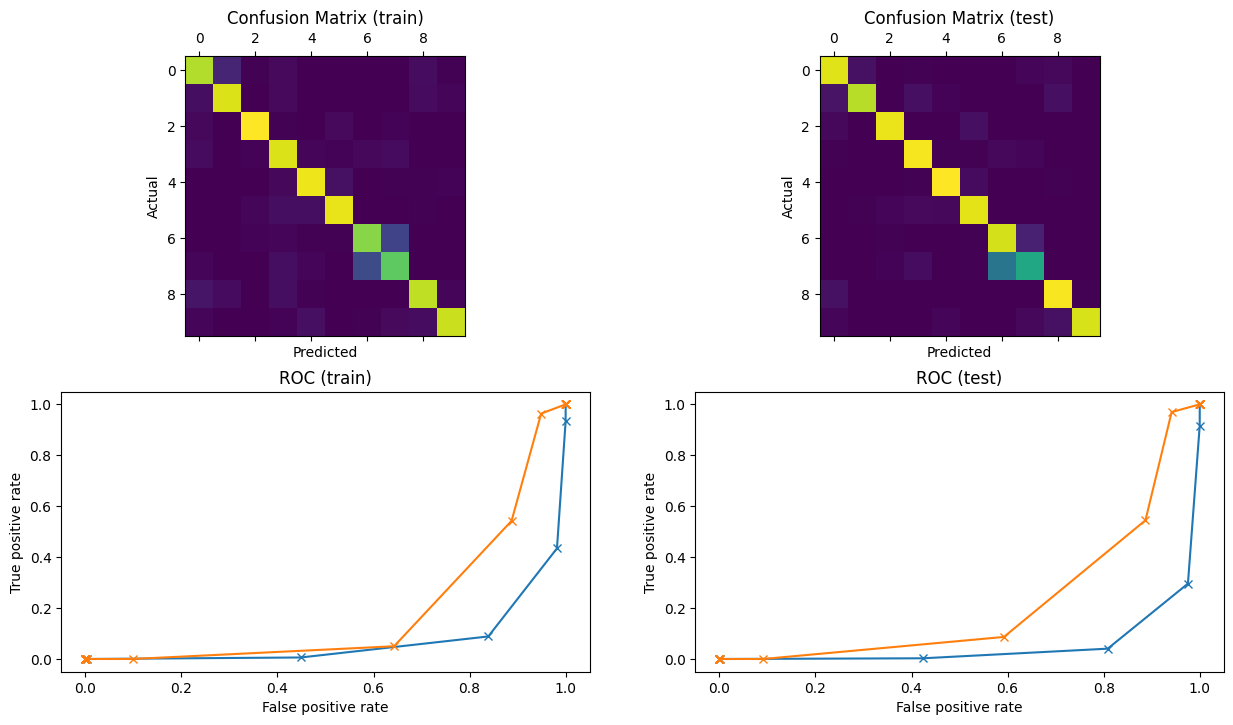

In [203]:
p5["result"][0] = metrics.print(*p5["splitData"][3], naiveLogNormal)

### Test split -- 90:10

------------------ Train ---------------------
Classification Accuracy :  0.8646111111111111
F1 Score                :  [0.84226081 0.8904775  0.95045087 0.86691542 0.91113549 0.91770158
 0.76823604 0.70943967 0.88028633 0.90937228]
------------------ Test ----------------------
Classification Accuracy :  0.8916666666666667
F1 Score                :  [0.91037736 0.86995516 0.92359362 0.91572123 0.9495935  0.92838654
 0.80652335 0.73252563 0.92886345 0.94280763]


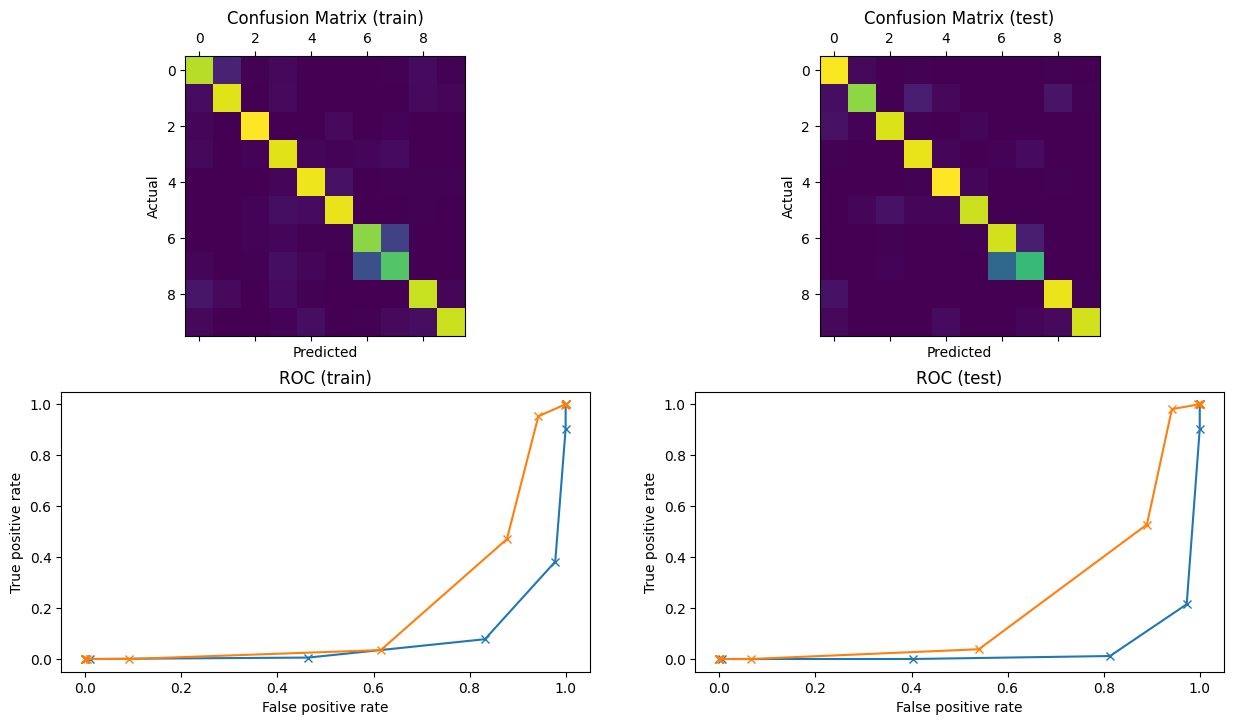

In [204]:
p5["result"][0] = metrics.print(*p5["splitData"][4], naiveLogNormal)

## Logistic Regression

In [244]:
def logisticRegressor(data):
    X_train,y_train_orig , X_test, y_test_orig, classStats = data
    num_classes = 10
    num_samples = y_train_orig.shape[0]
    y_train = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        y_train[i, int(y_train_orig[i]) - 1] = 1

    # Define sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define softmax function
    def softmax(x):
        # subtract the maximum value from x to avoid overflow
        x -= np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x)
        # divide by the sum of the exponential values along axis 1
        return exp_x / np.sum(exp_x, axis=1, keepdims=True, where=np.isfinite(exp_x))

    # Initialize weights and biases
    num_features = X_train.shape[1]
    W = np.random.randn(num_features, num_classes)
    b = np.random.randn(num_classes)

    # Set hyperparameters
    learning_rate = 0.1
    num_iterations = 1000
    epsilon = 1e-8

    # Train model using gradient descent
    prev_loss = float('inf')
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)

        # Compute loss
        loss = -np.sum(y_train * np.log(y_pred + epsilon)) / num_samples

        # Backward propagation
        dz = y_pred - y_train
        dW = np.dot(X_train.T, dz) / num_samples
        db = np.sum(dz, axis=0) / num_samples

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Check stopping criterion
        if prev_loss - loss < epsilon:
            print('Stopping criterion met')
            break

        prev_loss = loss

    # Evaluate model on test set
    z = np.dot(X_test, W) + b
    y_pred = np.argmax(softmax(z), axis=1) + 1
    accuracy = np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test accuracy:', accuracy)

    z_train = np.dot(X_train, W) + b
    y_train_pred = np.argmax(softmax(z_train), axis=1) + 1
    train_loss = -np.sum(y_train * np.log(softmax(z_train) + epsilon)) / num_samples
    train_error_rate = 1 - np.sum(y_train_pred == y_train_orig) / y_train_orig.shape[0]
    print('Training empirical risk:', train_loss)
    print('Training error rate:', train_error_rate)

    # Compute empirical risk on test data
    num_samples_test = y_test_orig.shape[0]
    y_test = np.zeros((num_samples_test, num_classes))
    for i in range(num_samples_test):
        y_test[i, int(y_test_orig[i]) - 1] = 1

    z_test = np.dot(X_test, W) + b
    test_loss = -np.sum(y_test * np.log(softmax(z_test) + epsilon)) / num_samples_test
    test_error_rate = 1 - np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test empirical risk:', test_loss)
    print('Test error rate:', test_error_rate)

    num_classes = len(np.unique(y_test_orig))
    confusion_matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_test_orig)):
        true_class = int(y_test_orig[i] - 1)
        predicted_class = int(y_pred[i] - 1)
        confusion_matrix[true_class, predicted_class] += 1
    # print('Confusion matrix:')
    # print(confusion_matrix)

    num_classes = len(np.unique(y_test_orig))
    f1_scores = np.zeros(num_classes)
    for i in range(num_classes):
        true_positives = confusion_matrix[i, i]
        false_positives = np.sum(confusion_matrix[:, i]) - true_positives
        false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
        precision = true_positives / (true_positives + false_positives + 1e-8)
        recall = true_positives / (true_positives + false_negatives + 1e-8)
        f1_scores[i] = 2 * precision * recall / (precision + recall + 1e-8)
    print('Class-wise F1 score:')
    print(f1_scores)

    # Choose two classes
    class_1 = 5
    class_2 = 3

    # Get predicted probabilities for the two classes
    y_class_1 = y_pred == class_1
    y_class_2 = y_pred == class_2
    y_prob_1 = softmax(z)[:, class_1 - 1]
    y_prob_2 = softmax(z)[:, class_2 - 1]

    # Compute true positive rate and false positive rate
    num_thresholds = 100
    tpr = np.zeros(num_thresholds)
    fpr = np.zeros(num_thresholds)
    for i in range(num_thresholds):
        threshold = i / (num_thresholds - 1)
        tp = np.sum((y_prob_1 >= threshold) & (y_class_1 == True))
        fp = np.sum((y_prob_1 >= threshold) & (y_class_1 == False))
        tn = np.sum((y_prob_2 < threshold) & (y_class_2 == True))
        fn = np.sum((y_prob_2 < threshold) & (y_class_2 == False))
        tpr[i] = tp / (tp + fn + 1e-8)
        fpr[i] = fp / (fp + tn + 1e-8)

    # Plot RoC curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].matshow(confusion_matrix)
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    ax[0].set_title("Confusion Matrix")
    
    ax[1].plot(fpr, tpr, marker='x')
    ax[1].set_xlabel("False positive rate")
    ax[1].set_ylabel("True positive rate")                     
    ax[1].set_title("ROC curve for classes {} and {}".format(class_1, class_2))
    
    fig.tight_layout()

### Test split -- 20:80

Stopping criterion met
Test accuracy: 0.7099791666666667
Training empirical risk: 3.4856639307137116
Training error rate: 0.27408333333333335
Test empirical risk: 3.7273103089401194
Test error rate: 0.2900208333333333
Class-wise F1 score:
[0.87163232 0.9231568  0.72239239 0.8626198  0.8838032  0.71177598
 0.10403317 0.91589389 0.87088138 0.86168784]


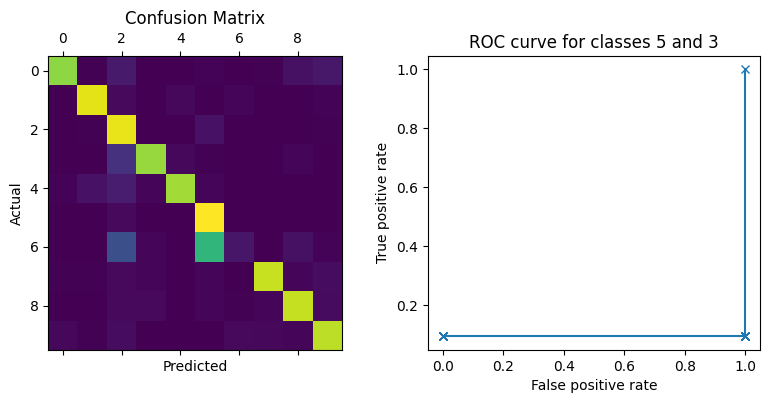

In [245]:
logisticRegressor(p5["splitData"][0])

### Test split -- 30:70

Stopping criterion met
Test accuracy: 0.7240714285714286
Training empirical risk: 3.4238402484056576
Training error rate: 0.2684444444444445
Test empirical risk: 3.440901565425159
Test error rate: 0.2759285714285714
Class-wise F1 score:
[0.9037616  0.90496388 0.77441077 0.8792517  0.86718359 0.70247713
 0.12797554 0.91522988 0.89711235 0.89275849]


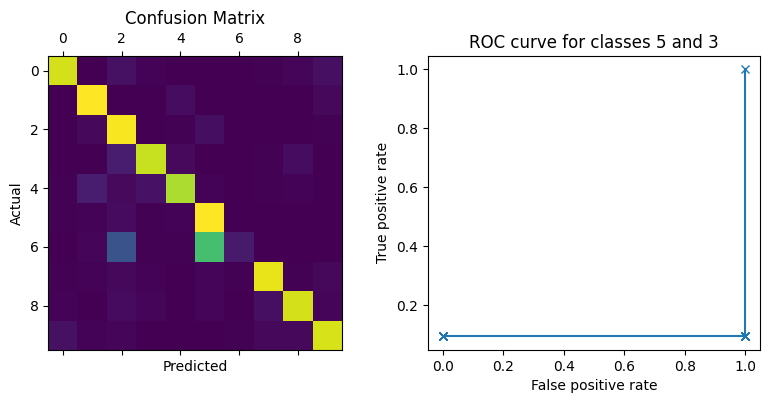

In [246]:
logisticRegressor(p5["splitData"][1])

### Test split -- 50:50

Stopping criterion met
Test accuracy: 0.6790666666666667
Training empirical risk: 4.83482792894046
Training error rate: 0.34819999999999995
Test empirical risk: 4.273714825186945
Test error rate: 0.3209333333333333
Class-wise F1 score:
[0.9171931  0.92998813 0.34685598 0.9083814  0.89993481 0.2831511
 0.51446529 0.93468321 0.91629502 0.89173693]


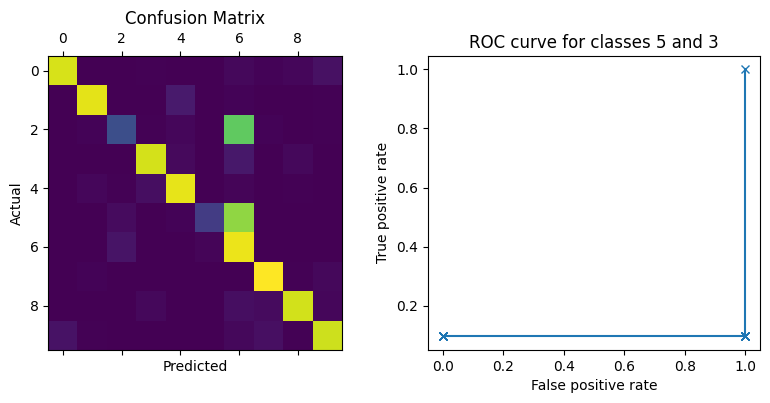

In [247]:
logisticRegressor(p5["splitData"][2])

### Test split -- 70:30

Stopping criterion met
Test accuracy: 0.7439444444444444
Training empirical risk: 3.5104263807808067
Training error rate: 0.2785714285714286
Test empirical risk: 3.0158563667697216
Test error rate: 0.2560555555555556
Class-wise F1 score:
[0.9254766  0.92277339 0.84661058 0.943686   0.8942172  0.69028615
 0.07340425 0.93082099 0.92914285 0.90396716]


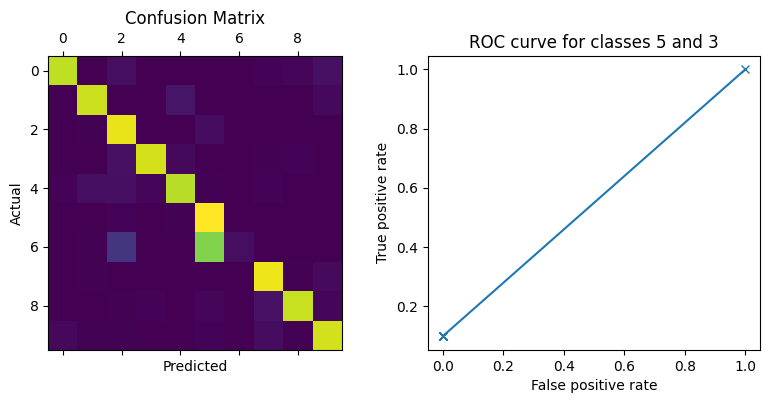

In [248]:
logisticRegressor(p5["splitData"][3])

### Test split -- 90:10

Stopping criterion met
Test accuracy: 0.725
Training empirical risk: 3.5450606165984073
Training error rate: 0.27942592592592597
Test empirical risk: 3.280606322722846
Test error rate: 0.275
Class-wise F1 score:
[0.86742756 0.90725126 0.85506072 0.93739703 0.85714285 0.66145251
 0.06752412 0.94323873 0.91452282 0.92003167]


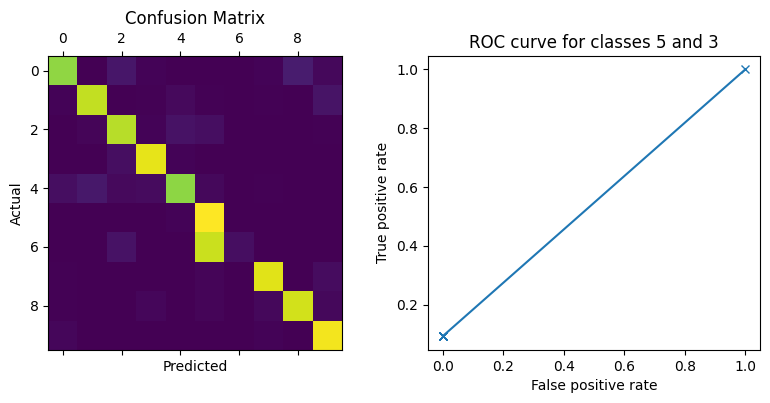

In [249]:
logisticRegressor(p5["splitData"][4])

## GMM

In [215]:
def gmm(data):
    pass

### Test split -- 20:80

In [216]:
gmm(p4["splitData"][0])

### Test split -- 30:70

In [217]:
gmm(p4["splitData"][1])

### Test split -- 50:50

In [218]:
gmm(p4["splitData"][2])

### Test split -- 70:30

In [219]:
gmm(p4["splitData"][3])

### Test split -- 90:10

In [220]:
gmm(p4["splitData"][4])